In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## FUNCIONES

In [28]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

from sklearn.base import BaseEstimator, TransformerMixin
# Transormador para codificar únicamente las columnas categoricas y devolver un DataFrame
class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [29]:
with open("datasets/daass-01.txt") as train_set:
    df = train_set.readlines()
df= pd.read_csv("datasets/daass-01.txt")

df2=df.copy()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118994 entries, 0 to 118993
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   target                             118994 non-null  int64  
 1   ID                                 118994 non-null  int64  
 2   IP                                 118994 non-null  object 
 3   Puerto                             118994 non-null  int64  
 4   Prot                               118994 non-null  object 
 5   Dur                                118994 non-null  float64
 6   num_pkt                            118994 non-null  int64  
 7   up_num_pkts                        118994 non-null  int64  
 8   dn_num_pkts                        118994 non-null  int64  
 9   pkt_bytes                          118994 non-null  int64  
 10  up_pkt_bytes                       118994 non-null  int64  
 11  dn_pkt_bytes                       1189

In [31]:
df["Puerto"].value_counts()

443    118592
22        402
Name: Puerto, dtype: int64

In [32]:
df["target"].value_counts()

1    117581
0      1386
2        27
Name: target, dtype: int64

In [33]:
counts = pd.crosstab(df['target'], df['Puerto'])

print(counts)

Puerto  22      443
target             
0       375    1011
1         0  117581
2        27       0


In [20]:
X_train = df.drop("target", axis=1)
y_train = df["target"].copy()

X_train['Puerto'] = X_train['Puerto'].astype('object')
X_train['IP'] = X_train['IP'].astype('object')
X_train['Prot'] = X_train['Prot'].astype('object')
X_train = X_train.drop(['ID'], axis=1)
X_train

,IP,Puerto,Prot,Dur,num_pkt,up_num_pkts,dn_num_pkts,pkt_bytes,up_pkt_bytes,dn_pkt_bytes,concurrent_pflows,concurrent_pflow_avg_num_pkts,concurrent_pflow_up_avg_num_pkts,concurrent_pflow_dn_avg_num_pkts,concurrent_pflow_avg_pkt_bytes,concurrent_pflow_up_avg_pkt_bytes,concurrent_pflow_dn_avg_pkt_bytes
0,10.0.66.11,443,TCP,1.738043,38,20,18,41688,2172,39516,204,5759.0,2775.0,2984.0,6726635.0,320244.0,6406391.0
1,10.0.66.11,443,TCP,1.718097,39,21,18,41646,2130,39516,203,5749.0,2770.0,2979.0,6714483.0,320014.0,6394469.0
2,10.0.66.11,443,TCP,1.724562,39,21,18,41646,2130,39516,209,5811.0,2808.0,3003.0,6763933.0,322462.0,6441471.0
3,10.0.66.11,443,TCP,1.704928,39,21,18,41646,2130,39516,215,5847.0,2838.0,3009.0,6766189.0,324274.0,6441915.0
4,10.0.66.11,443,TCP,1.646001,38,20,18,41688,2172,39516,207,5803.0,2802.0,3001.0,6763325.0,322002.0,6441323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118989,10.0.66.11,443,TCP,1.846027,39,21,18,41646,2130,39516,240,6171.0,3236.5,2934.5,6526958.0,344483.0,6182475.0
118990,10.0.66.11,443,TCP,1.814395,39,21,18,41646,2130,39516,238,6094.0,3182.5,2911.5,6480316.0,339457.0,6140859.0
118991,10.0.66.11,443,TCP,1.793259,39,21,18,41646,2130,39516,237,6046.5,3148.5,2898.0,6455057.0,336019.0,6119038.0
118992,10.0.66.11,443,TCP,1.768839,41,22,19,44698,2220,42478,237,6012.0,3122.0,2890.0,6445189.0,332658.5,6112530.5


In [21]:
from sklearn.preprocessing import OneHotEncoder
customOneHot = CustomOneHotEncoding()
X_train_prep = customOneHot.fit_transform(X_train)
X_train_prep

C:\Users\X571\AppData\Local\Temp\ipykernel_17792\2648995292.py:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  self._columns = pd.get_dummies(X_cat).columns
C:\Users\X571\anaconda3\envs\CursoMachineLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Dur,num_pkt,up_num_pkts,dn_num_pkts,pkt_bytes,up_pkt_bytes,dn_pkt_bytes,concurrent_pflows,concurrent_pflow_avg_num_pkts,concurrent_pflow_up_avg_num_pkts,concurrent_pflow_dn_avg_num_pkts,concurrent_pflow_avg_pkt_bytes,concurrent_pflow_up_avg_pkt_bytes,concurrent_pflow_dn_avg_pkt_bytes,IP_10.0.66.10,IP_10.0.66.11,Puerto_22,Puerto_443,Prot_TCP
0,1.738043,38,20,18,41688,2172,39516,204,5759.0,2775.0,2984.0,6726635.0,320244.0,6406391.0,0.0,1.0,0.0,1.0,1.0
1,1.718097,39,21,18,41646,2130,39516,203,5749.0,2770.0,2979.0,6714483.0,320014.0,6394469.0,0.0,1.0,0.0,1.0,1.0
2,1.724562,39,21,18,41646,2130,39516,209,5811.0,2808.0,3003.0,6763933.0,322462.0,6441471.0,0.0,1.0,0.0,1.0,1.0
3,1.704928,39,21,18,41646,2130,39516,215,5847.0,2838.0,3009.0,6766189.0,324274.0,6441915.0,0.0,1.0,0.0,1.0,1.0
4,1.646001,38,20,18,41688,2172,39516,207,5803.0,2802.0,3001.0,6763325.0,322002.0,6441323.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118989,1.846027,39,21,18,41646,2130,39516,240,6171.0,3236.5,2934.5,6526958.0,344483.0,6182475.0,0.0,1.0,0.0,1.0,1.0
118990,1.814395,39,21,18,41646,2130,39516,238,6094.0,3182.5,2911.5,6480316.0,339457.0,6140859.0,0.0,1.0,0.0,1.0,1.0
118991,1.793259,39,21,18,41646,2130,39516,237,6046.5,3148.5,2898.0,6455057.0,336019.0,6119038.0,0.0,1.0,0.0,1.0,1.0
118992,1.768839,41,22,19,44698,2220,42478,237,6012.0,3122.0,2890.0,6445189.0,332658.5,6112530.5,0.0,1.0,0.0,1.0,1.0


## PCA

In [22]:
# Reducimos el conjunto de datos a 2 dimensiones utilizando el algoritmo PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df_reduced = pca.fit_transform(X_train_prep)

In [23]:
df_reduced = pd.DataFrame(df_reduced, columns=["c1", "c2","c3"])
df_reduced

,c1,c2,c3
0,174864.977017,563.668910,25107.924954
1,157841.151990,504.491104,24895.746421
2,226101.284905,595.811438,23878.644192
3,228074.164348,572.497063,21715.501452
4,225550.518591,632.367820,24425.892167
...,...,...,...
118989,-123670.881769,-387.324399,-13266.098333
118990,-186231.174145,-429.553033,-8924.936843
118991,-219630.028097,-440.848797,-5682.566476
118992,-231330.409549,3840.920217,-1956.613827


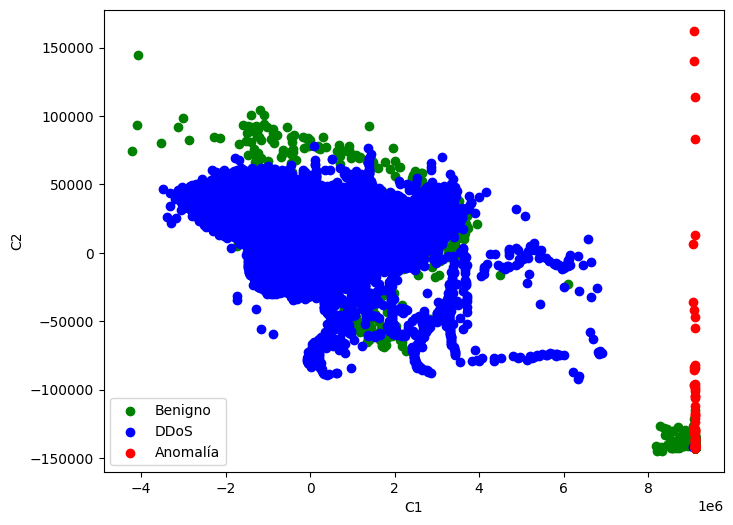

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
data = pd.concat([df_reduced, y_train], axis=1)


# Definir los colores personalizados
custom_colors = ['green', 'blue', 'red']

# Definir leyendas personalizadas
target_labels = ['Benigno', 'DDoS', 'Anomalía']

# Graficar las características con colores personalizados y leyendas
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_labels):
    df_subset = data[data['target'] == i]
    plt.scatter(df_subset['c1'], df_subset['c2'], color=custom_colors[i], label=label)

plt.xlabel('C1')
plt.ylabel('C2')
plt.legend()
plt.show()



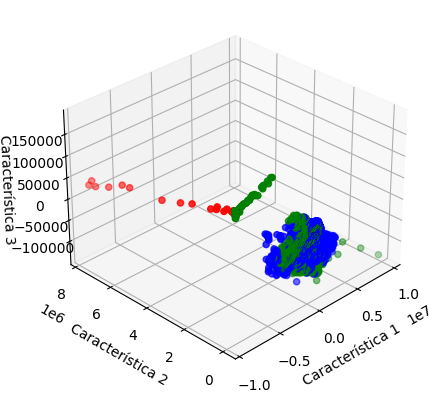

In [25]:
import matplotlib.pyplot as plt



# Obtener las características X1, X2 y X3 del DataFrame df_reduced
X1 = df_reduced['c1']
X2 = df_reduced['c2']
X3 = df_reduced['c3']

# Obtener los valores de la columna target
target = y_train

# Definir un diccionario de colores para asignar a cada valor de target
color_map = {0: 'green', 1: 'blue', 2: 'red'}

# Crear una figura
fig = plt.figure()

# Crear un gráfico 3D
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D y asignar colores según el valor de target
ax.scatter(X1, X2, X3, c=target.map(color_map))

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.view_init(elev=30, azim=225)
plt.savefig('PCA_3D_01.png', format='png')
# Mostrar la gráfica
plt.show()


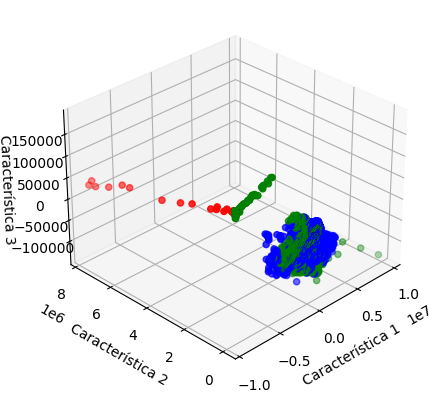

In [26]:
import matplotlib.pyplot as plt

# Obtener las características X1, X2 y X3 del DataFrame df_reduced
X1 = df_reduced['c1']
X2 = df_reduced['c2']
X3 = df_reduced['c3']

# Obtener los valores de la columna target
target = y_train

# Definir un diccionario de colores para asignar a cada valor de target
color_map = {0: 'green', 1: 'blue', 2: 'red'}

# Crear una figura
fig = plt.figure()

# Crear un gráfico 3D
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D y asignar colores según el valor de target
ax.scatter(X1, X2, X3, c=target.map(color_map))

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.view_init(elev=30, azim=225)

# Guardar la gráfica como SVG
plt.savefig('grafica.svg', format='svg')

# Mostrar la gráfica
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


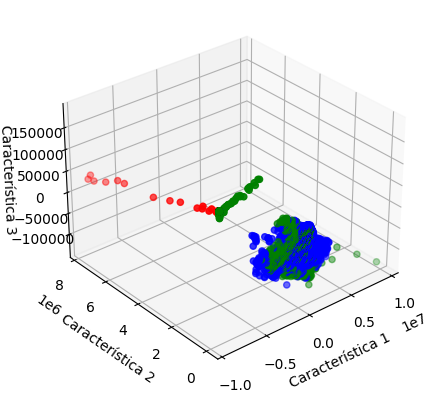

In [31]:
import matplotlib.pyplot as plt

# Obtener las características X1, X2 y X3 del DataFrame df_reduced
X1 = df_reduced['c1']
X2 = df_reduced['c2']
X3 = df_reduced['c3']

# Obtener los valores de la columna target
target = y_train

# Definir un diccionario de colores para asignar a cada valor de target
color_map = {0: 'green', 1: 'blue', 2: 'red'}

# Crear una figura
fig = plt.figure()

# Crear un gráfico 3D
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D y asignar colores según el valor de target
ax.scatter(X1, X2, X3, c=target.map(color_map))

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.view_init(elev=30, azim=230)

# Guardar la gráfica como EPS
plt.savefig('PCA_3D_01.eps', format='eps')

# Mostrar la gráfica
plt.show()


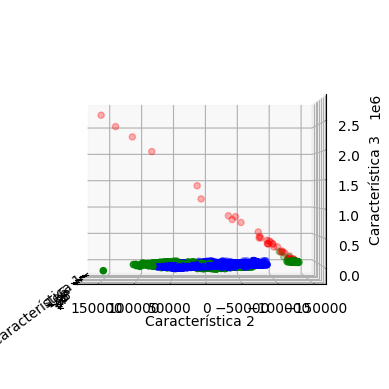

In [14]:
import matplotlib.pyplot as plt

# Obtener las características X1, X2 y X3 del DataFrame df_reduced
X1 = df_reduced['c1']
X2 = df_reduced['c2']
X3 = df_reduced['c3']

# Obtener los valores de la columna target
target = y_train

# Definir un diccionario de colores para asignar a cada valor de target
color_map = {0: 'green', 1: 'blue', 2: 'red'}

# Crear una figura
fig = plt.figure()

# Crear un gráfico 3D
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D y asignar colores según el valor de target
ax.scatter(X1, X2, X3, c=target.map(color_map))

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.view_init(elev=0, azim=180)
# Mostrar la gráfica
plt.show()


# ARBOL DE DECISION

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

data = pd.concat([df_reduced, y_train], axis=1)
data['target'] = data['target'].replace({1: 0, 2: 1})

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('target', axis=1)
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Crear el clasificador de Árbol de Decisión
dt = DecisionTreeClassifier()

# Entrenar el modelo
dt.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = dt.predict(X_test)

# Calcular la precisión y F1-score
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

# Imprimir los resultados
print("Precisión del modelo de Árbol de Decisión:", accuracy)
print("F1-score del modelo de Árbol de Decisión:", f1score)

Precisión del modelo de Árbol de Decisión: 0.9998739442833733
F1-score del modelo de Árbol de Decisión: 0.6666666666666665


# SVM

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

data = pd.concat([df_reduced, y_train], axis=1)
data['target'] = data['target'].replace({1: 0, 2: 1})

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('target', axis=1)
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear un clasificador SVM
svm = SVC(kernel='linear')

# Entrenar el modelo SVM
svm.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular el F1-score
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score del modelo SVM:", f1score)

Precisión: 1.0
Recall: 0.38461538461538464
F1-score del modelo SVM: 0.5555555555555556


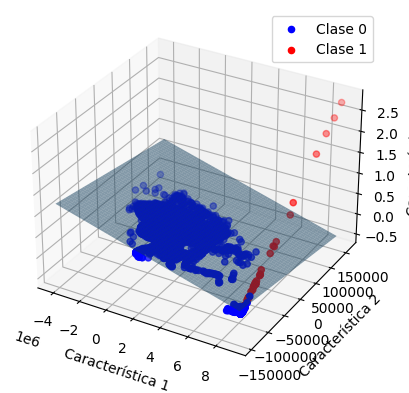

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()

# Mostrar la gráfica en 3D
plt.show()


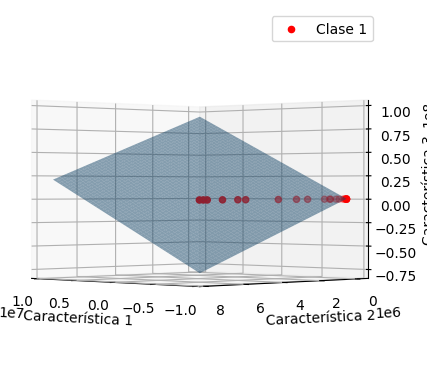

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Graficar los puntos de cada clase en 3D
#ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 7])
#ax.set_zlim([0, 2])
ax.view_init(elev=0, azim=135)
#ax.view_init(elev=0, azim=0)
# Mostrar la gráfica en 3D
plt.show()


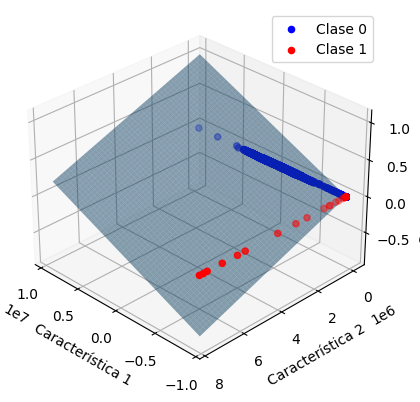

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 7])
#ax.set_zlim([0, 2])

ax.view_init(elev=30, azim=135)
# Mostrar la gráfica en 3D
plt.show()


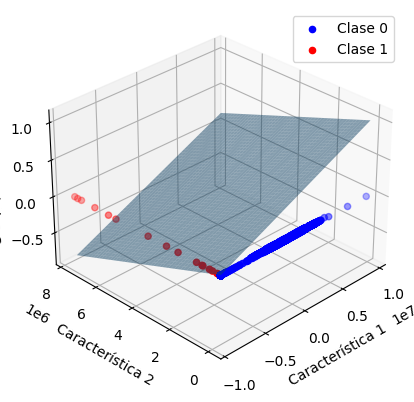

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 7])
#ax.set_zlim([0, 2])

ax.view_init(elev=30, azim=225)
# Mostrar la gráfica en 3D
plt.show()
